# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from ipywidgets import interact, IntSlider, FloatSlider

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
AGREEMENT_RK                  15223 non-null int64
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PRO

In [7]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [8]:
df_test.shape

(14910, 52)

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14910 entries, 0 to 14909
Data columns (total 52 columns):
AGREEMENT_RK                  14910 non-null int64
TARGET                        14910 non-null int64
AGE                           14910 non-null int64
SOCSTATUS_WORK_FL             14910 non-null int64
SOCSTATUS_PENS_FL             14910 non-null int64
GENDER                        14910 non-null int64
CHILD_TOTAL                   14910 non-null int64
DEPENDANTS                    14910 non-null int64
EDUCATION                     14910 non-null object
MARITAL_STATUS                14910 non-null object
GEN_INDUSTRY                  13564 non-null object
GEN_TITLE                     13564 non-null object
ORG_TP_STATE                  13564 non-null object
ORG_TP_FCAPITAL               13567 non-null object
JOB_DIR                       13564 non-null object
FAMILY_INCOME                 14910 non-null object
PERSONAL_INCOME               14910 non-null object
REG_ADDRESS_PRO

In [10]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [11]:
#df_train.loc[:, 'sample'] = 'train'
#df_test.loc[:, 'sample'] = 'test'

df_train.loc[:, 'sample'] = 1
df_test.loc[:, 'sample'] = 0




In [12]:
df = df_test.append(df_train).reset_index(drop=True)

In [13]:
df.shape

(30133, 53)

In [14]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,0
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,0
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,0
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,0
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,0


### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [16]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Два и более высших образования', 'Высшее', 'Ученая степень', 'Среднее специальное', 'Неполное среднее', 'Неоконченное высшее'}


MARITAL_STATUS
{'Разведен(а)', 'Гражданский брак', 'Вдовец/Вдова', 'Состою в браке', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Страхование', 'Транспорт', 'Салоны красоты и здоровья', 'Информационные услуги', 'СМИ/Реклама/PR-агенства', 'Маркетинг', 'Недвижимость', 'Государственная служба', 'Банк/Финансы', 'Химия/Парфюмерия/Фармацевтика', 'Туризм', 'Наука', 'Коммунальное хоз-во/Дорожные службы', 'Строительство', 'Энергетика', 'Подбор персонала', 'Управляющая компания', 'Торговля', 'Здравоохранение', 'Нефтегазовая промышленность', 'Сельское хозяйство', 'Логистика', 'Юридические услуги/нотариальные услуги', 'Развлечения/Искусство', 'Образование', 'Металлургия/Промышленность/Машиностроение', 'Ресторанный бизнес/Общественное питание', 'ЧОП/Детективная д-ть', 'Информационные технологии', 'Сборочные производства', 'Другие сферы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

1) Да, пропуски есть в следующих столбцах

GEN_INDUSTRY                  отрасль работы клиента
GEN_TITLE                     должность
ORG_TP_STATE                  форма собственности компании
ORG_TP_FCAPITAL               отношение к иностранному капиталу
JOB_DIR                       направление деятельности в нутри компании

TP_PROVINCE                   область торговой точки, где клиент брал послед...

WORK_TIME                     время работы на текущем месте (в месяцах)


PREVIOUS_CARD_NUM_UTILIZED    количество уже утилизированных карт ( если пус...

2) Делать можно следующее:
    - удалить столбец или строку
    - заменить медианой
    - еще есть какой-то метод прогнозирования
    - сформировать Гипитозы, например TP_PROVINCE заменить значением Области из 
    фактического прибывания клиента, так как скорее всего где он живет, там и берет кредит. 
    Есть сервис DaData который по адресу может вернуть область. 
    
   

In [18]:
# Находи места где адреса не совпадают и TP_PROVINCE isnull
# после зачистки это не нужно но оставлю, может потом эксперемент можно провести
#df_new = df.loc[(df['TP_PROVINCE'] != df['FACT_ADDRESS_PROVINCE'])&(df['TP_PROVINCE'].isnull())]


#df_new[['TP_PROVINCE','FACT_ADDRESS_PROVINCE']]

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

1) Да, есть

2) Их можно преобразовать в числа, и потом сделать OneHotEncoder, но я когда так сделал у меня появилось больше 400 столбцов, и модель стала хуже, поэтому просто преоразовал в числа. 



#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [19]:
    df_1 = df.copy()
    df_2 = df.copy()



In [20]:
df.loc[df['WORK_TIME'].isnull(),'WORK_TIME'] = df['WORK_TIME'].median()

In [21]:
df['WORK_TIME']

0         39.0
1         48.0
2        156.0
3          9.0
4         84.0
5         48.0
6        444.0
7        144.0
8         48.0
9         36.0
10        15.0
11        60.0
12        48.0
13        96.0
14         6.0
15        24.0
16       120.0
17       384.0
18        36.0
19       192.0
20        48.0
21        42.0
22        20.0
23        48.0
24       240.0
25        12.0
26        19.0
27        48.0
28        48.0
29        24.0
         ...  
30103    204.0
30104     36.0
30105    360.0
30106     48.0
30107     48.0
30108     72.0
30109     18.0
30110     36.0
30111     84.0
30112      7.0
30113      8.0
30114     27.0
30115    160.0
30116    384.0
30117     24.0
30118     60.0
30119      6.0
30120     12.0
30121     48.0
30122    204.0
30123     48.0
30124     96.0
30125    120.0
30126    132.0
30127    108.0
30128     48.0
30129    156.0
30130     48.0
30131     48.0
30132     36.0
Name: WORK_TIME, Length: 30133, dtype: float64

In [22]:


def preproc_data(df_input):
    df_output = df_input.copy()
    #from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    
    ## Your Code Here
    
    #Удаляло идентификатор AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis = 1)
    
    #Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

    #Что-то делала с пропусками
    
    # около 2700 строк WORK_TIME с NaN решил их убрать, так как время работы важный параметр.
    # просто считать медиану по не стал бы
    #df_output = df_output[~df_output['WORK_TIME'].isnull()]
    
    df_output.loc[df_output['WORK_TIME'].isnull(),'WORK_TIME'] = df_output['WORK_TIME'].median()

    # TP_PROVINCE тоже для простаты убрал, не стал заморачиваться с фактическим адресом
    
    df_output = df_output[~df_output['TP_PROVINCE'].isnull()]

    # PREVIOUS_CARD_NUM_UTILIZED количество уже утилизированных карт ( если пусто - 0) 
    # тут надо бы уточнить все учтонить NaN это есть пусто и соответственно значит = 0 ??
    # в общем берем NaN что это есть просто 0

    df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0, inplace=True)
    
    # Кодировала категориальные признаки 
    
  
    label_encoder = LabelEncoder()
    categorical_columns = df_output.columns[df_output.dtypes == 'object']
    for column in categorical_columns:
          df_output[column] = label_encoder.fit_transform(df_output[column].astype(str))
    
    
    # когда так делаю совсем все плохо
    #df_output = pd.get_dummies(df_output, columns=categorical_columns)
    
    #onehot_encoder = OneHotEncoder(sparse=False)
    #df_output = pd.DataFrame(onehot_encoder.fit_transform(df_output[categorical_columns]))
    
    
    
    return df_output

In [23]:
df_preproc = df_1.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == 0').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == 1').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [24]:
y = df_train_preproc['TARGET']
df_train_preproc = df_train_preproc.drop(['TARGET'], axis=1)

y_test = df_test_preproc['TARGET']
df_test_preproc = df_test_preproc.drop(['TARGET'], axis=1)


#### Задание 5. Обучение и оценка качества разных моделей

In [25]:
from sklearn.cross_validation import train_test_split

# test_size=0.3, random_state=42

## Your Code Here
# ? зачем так делать если вверху мы и так руками все разбили

X_train, X_test, y_train, y_test = train_test_split(df_train_preproc, y, test_size=0.33, random_state=42)

/Users/dmitryvernikovsky/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
X_train.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
9710,47,1,0,1,1,0,0,3,10,12,...,0,1,2,2,9,0,0,0.0,0.0,0.0
5357,56,0,1,1,2,0,5,4,0,0,...,0,0,1,1,3,0,0,0.0,0.0,0.0
5395,27,1,0,1,1,1,0,4,4,12,...,0,1,1,1,2,0,0,0.0,0.0,0.0
3343,27,1,0,0,0,0,0,2,3,2,...,0,1,1,0,6,0,0,0.0,0.0,0.0
12978,42,1,0,1,2,1,4,4,24,12,...,0,1,2,2,18,0,0,0.0,0.0,0.0


In [27]:
X_test.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
11434,47,1,0,0,0,0,4,2,3,12,...,0,1,1,1,6,0,0,0.0,0.0,0.0
6627,49,1,0,0,1,0,0,4,25,4,...,0,1,1,0,4,0,0,0.0,0.0,0.0
10547,33,1,0,0,1,1,0,4,10,7,...,0,1,2,2,6,0,0,0.0,0.0,0.0
1240,59,1,0,1,3,0,5,4,24,12,...,0,1,1,0,5,0,0,0.0,0.0,0.0
11376,58,0,1,1,1,0,5,4,0,0,...,0,0,2,1,11,0,0,0.0,0.0,0.0


In [28]:
y_train

9710     0
5357     0
5395     0
3343     0
12978    0
11387    0
2951     0
799      0
7677     0
7227     0
5095     0
5910     0
9307     0
7170     0
6064     0
3449     0
4627     1
12748    0
1816     0
6593     0
3022     0
5011     0
8376     0
355      0
13040    0
14654    0
3420     0
43       0
812      0
3607     0
        ..
3459     0
4656     0
1205     0
6578     0
5167     0
5439     0
2484     0
7124     0
14091    0
10828    0
780      1
1718     0
8538     0
11361    0
11615    0
11891    0
14718    0
5715     0
4522     1
13811    0
472      0
6412     0
5874     0
11535    0
12224    0
5313     1
13703    0
5520     0
871      0
7455     0
Name: TARGET, Length: 9792, dtype: int64

In [29]:
y_test

11434    0
6627     0
10547    0
1240     0
11376    0
6816     0
2642     0
2375     0
9055     0
7063     0
12042    0
2567     0
6614     0
7814     0
363      0
11315    0
2529     0
9790     0
9051     0
3346     0
11451    0
2910     1
8317     0
8925     0
11460    0
10084    0
3081     0
10983    0
14625    1
5060     0
        ..
2558     0
7668     1
2514     0
5823     0
2908     0
9264     0
13019    0
1642     0
5556     0
2238     0
1762     0
11139    1
10403    0
8004     0
9604     0
9175     0
14591    0
7522     1
6092     0
4133     0
5349     0
8589     0
7739     1
9392     0
4335     0
9819     0
9126     0
2816     0
2545     0
3207     0
Name: TARGET, Length: 4823, dtype: int64

In [30]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

model_LR = LogisticRegression()                     # инициализируем модель
model_LR.fit(X_train, y_train)                      # обучаем модель на трейн данных и тест данных
predict_LR = model_LR.predict(X_test)                  # делаем предсказание
predict_proba_LR = model_LR.predict_proba(X_test)      # вероятность

print('precision LR', precision_score(y_test, predict_LR))
print('recall LR', recall_score(y_test, predict_LR))
print('accuracy LR', accuracy_score(y_test, predict_LR))




/Users/dmitryvernikovsky/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


precision LR 0.16666666666666666
recall LR 0.0018315018315018315
accuracy LR 0.8859630935102634


In [31]:
model_RF = RandomForestClassifier(n_estimators=1000)
model_RF.fit(X_train, y_train)
predict_RF = model_RF.predict(X_test)
predict_proba_RF = model_RF.predict_proba(X_test)

print('precision RF', precision_score(y_test, predict_RF))
print('recall RF', recall_score(y_test, predict_RF))
print('accuracy RF', accuracy_score(y_test, predict_RF))


precision RF 0.0
recall RF 0.0
accuracy RF 0.8867924528301887


/Users/dmitryvernikovsky/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
model_DT = DecisionTreeClassifier(criterion='entropy', random_state=100)
model_DT.fit(X_train, y_train)
predict_DT = model_DT.predict(X_test)
predict_proba_DT = model_DT.predict_proba(X_test)

print('precision DT', precision_score(y_test, predict_DT))
print('recall DT', recall_score(y_test, predict_DT))
print('accuracy DT', accuracy_score(y_test, predict_DT))

precision DT 0.1500815660685155
recall DT 0.1684981684981685
accuracy DT 0.7978436657681941


In [33]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

print('------ LogisticRegression ------')
print(end='\n',flush=True)

print('precision LR', precision_score(y_test, predict_LR))
print('recall LR', recall_score(y_test, predict_LR))
print('accuracy LR', accuracy_score(y_test, predict_LR))

print(end='\n',flush=True)
print('------ RandomForestClassifier ------')
print(end='\n',flush=True)

print('precision RF', precision_score(y_test, predict_RF))
print('recall RF', recall_score(y_test, predict_RF))
print('accuracy RF', accuracy_score(y_test, predict_RF))

print(end='\n',flush=True)
print('------ DecisionTreeClassifier ------')
print(end='\n',flush=True)

print('precision DT', precision_score(y_test, predict_DT))
print('recall DT', recall_score(y_test, predict_DT))
print('accuracy DT', accuracy_score(y_test, predict_DT))


------ LogisticRegression ------

precision LR 0.16666666666666666
recall LR 0.0018315018315018315
accuracy LR 0.8859630935102634

------ RandomForestClassifier ------

precision RF 0.0
recall RF 0.0
accuracy RF 0.8867924528301887

------ DecisionTreeClassifier ------

precision DT 0.1500815660685155
recall DT 0.1684981684981685
accuracy DT 0.7978436657681941


/Users/dmitryvernikovsky/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/Users/dmitryvernikovsky/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


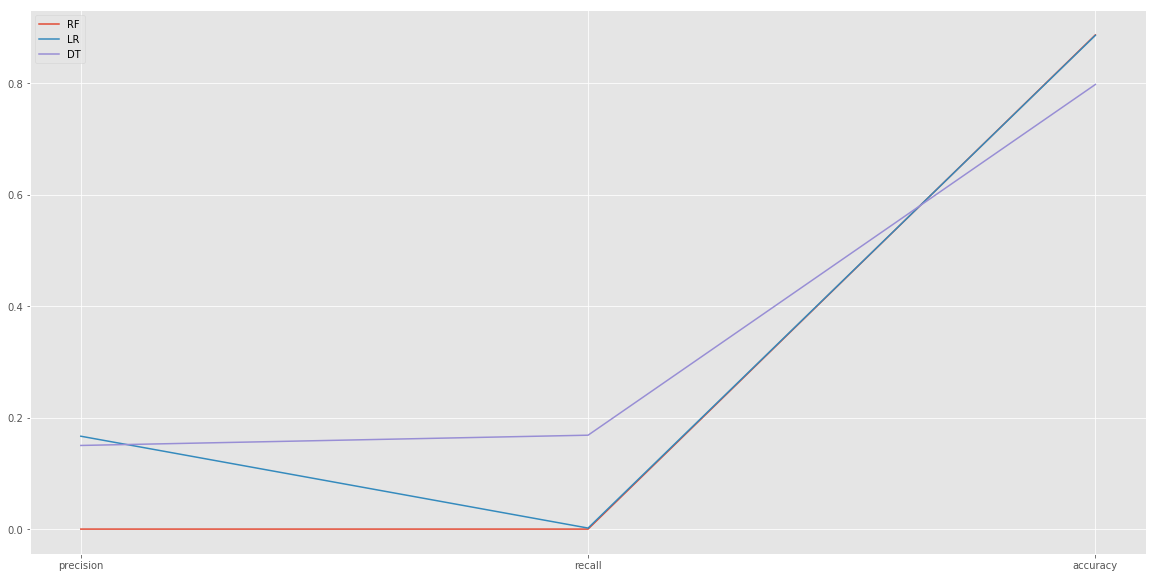

In [34]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
_, ax = plt.subplots(figsize=(20,10))



data_LR_txt = []
data_LR = []
data_LR = [precision_score(y_test, predict_LR),recall_score(y_test, predict_LR),accuracy_score(y_test, predict_LR)]
data_LR_txt = (['precision','recall','accuracy'])

data_RF_txt = []
data_RF = []
data_RF = [precision_score(y_test, predict_RF),recall_score(y_test, predict_RF),accuracy_score(y_test, predict_RF)]
data_RF_txt = (['precision','recall','accuracy'])

data_DT_txt = []
data_DT = []
data_DT = [precision_score(y_test, predict_DT),recall_score(y_test, predict_DT),accuracy_score(y_test, predict_DT)]
data_DT_txt = (['precision','recall','accuracy'])


plt.plot(data_RF_txt,data_RF,label='RF')
plt.plot(data_LR_txt,data_LR,label='LR')
plt.plot(data_DT_txt,data_DT,label='DT')
plt.legend()


(-0.01, 1.01)

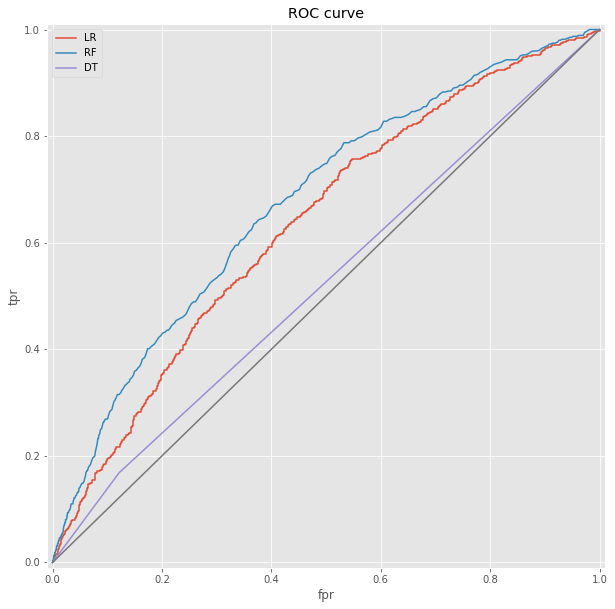

In [35]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here

from sklearn.metrics import roc_auc_score, roc_curve

fpr_LR, tpr_LR, thresholds = roc_curve(y_test, predict_proba_LR[:,1]) #вложили реальные Y  и предугаданные
fpr_RF, tpr_RF, thresholds = roc_curve(y_test, predict_proba_RF[:,1]) #вложили реальные Y  и предугаданные
fpr_DT, tpr_DT, thresholds = roc_curve(y_test, predict_proba_DT[:,1]) #вложили реальные Y  и предугаданные
plt.figure(figsize=(10, 10))
plt.plot(fpr_LR, tpr_LR,label='LR')
plt.plot(fpr_RF, tpr_RF,label='RF')
plt.plot(fpr_DT, tpr_DT,label='DT')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend()
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [36]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here

RF = RandomForestClassifier()
LR = LogisticRegression()
DT = DecisionTreeClassifier()

print(end='\n',flush=True)
print('------ RandomForestClassifier ------')
print(end='\n',flush=True)

np.average( cross_val_score(
    RF,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10 
),axis=0)




------ RandomForestClassifier ------



0.5967129926671763

In [37]:
print('------ LogisticRegression ------')
print(end='\n',flush=True)

np.average(cross_val_score(
    LR,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10 
),axis=0)

------ LogisticRegression ------



0.5975484171736203

In [38]:

print(end='\n',flush=True)
print('------ DecisionTreeClassifier ------')
print(end='\n',flush=True)

np.average( cross_val_score(
    DT,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10 
),axis=0)


------ DecisionTreeClassifier ------



0.5343182754218487

In [40]:
df_test_preproc.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
14910,49,1,0,1,2,1,5,4,24,7,...,0,1,1,1,6,2,1,1580.000000,1580.0,0.0
14911,32,1,0,1,3,3,4,4,24,7,...,0,1,1,1,6,1,1,4020.000000,4020.0,0.0
14912,52,1,0,1,4,0,3,4,5,12,...,0,1,2,1,11,0,0,0.000000,0.0,0.0
14913,39,1,0,1,1,1,0,4,14,10,...,1,1,1,1,6,3,1,1589.923333,1590.0,0.0
14914,30,1,0,0,0,0,4,4,2,12,...,0,1,2,1,16,2,1,1152.150000,2230.0,0.0


In [41]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

#predict = 
## Your Code Here

model_RF = RandomForestClassifier()                     # инициализируем модель
model_RF.fit(X_train, y_train)                      # обучаем модель на трейн данных и тест данных
predict_RF = model_RF.predict(X_test)                  # делаем предсказание
predict_proba_RF = model_RF.predict_proba(X_test)      # вероятность

roc_auc_score(y_test, predict_proba_LR[:,1])

0.6348695338641563

In [42]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here

roc_auc = cross_val_score(
    RF,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=100 
)


print(roc_auc)

[0.49031008 0.41666667 0.79651163 0.57170543 0.64147287 0.74806202
 0.62015504 0.60465116 0.58333333 0.48062016 0.64728682 0.49612403
 0.69573643 0.57945736 0.4127907  0.4244186  0.43604651 0.60077519
 0.6627907  0.72286822 0.61434109 0.66085271 0.63953488 0.63565891
 0.45930233 0.59302326 0.4496124  0.68023256 0.64147287 0.45930233
 0.63178295 0.68217054 0.37984496 0.76937984 0.63953488 0.7248062
 0.41666667 0.47868217 0.54651163 0.33527132 0.68410853 0.77906977
 0.7751938  0.64534884 0.53682171 0.43217054 0.74883721 0.42790698
 0.68837209 0.66511628 0.61627907 0.87209302 0.57674419 0.40465116
 0.6        0.87674419 0.49069767 0.54186047 0.34651163 0.53255814
 0.59302326 0.54651163 0.48604651 0.85116279 0.4744186  0.68372093
 0.55813953 0.4        0.61860465 0.67674419 0.66046512 0.47674419
 0.57209302 0.32325581 0.50232558 0.41860465 0.8        0.53333333
 0.8452381  0.76190476 0.79047619 0.6452381  0.61190476 0.67857143
 0.8452381  0.63333333 0.71428571 0.68333333 0.76428571 0.64523

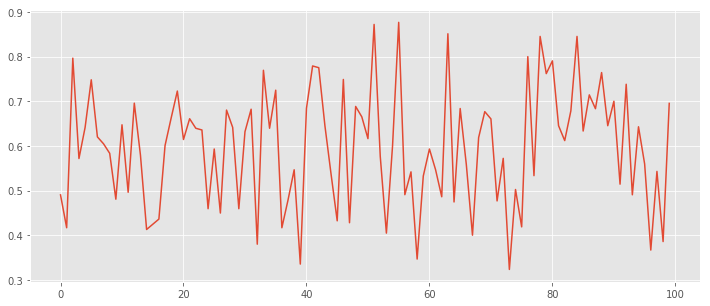

In [43]:
plt.plot(range(0,100),roc_auc)

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

Confusion matrix, without normalization
[[4272    5]
 [ 545    1]]
Normalized confusion matrix
[[0.99883096 0.00116904]
 [0.9981685  0.0018315 ]]


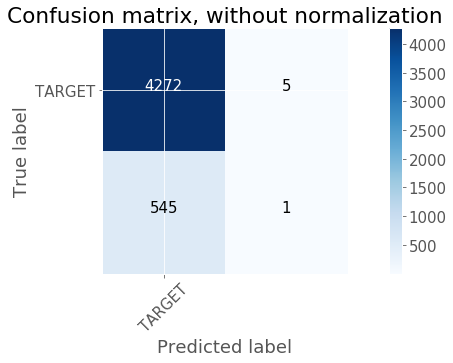

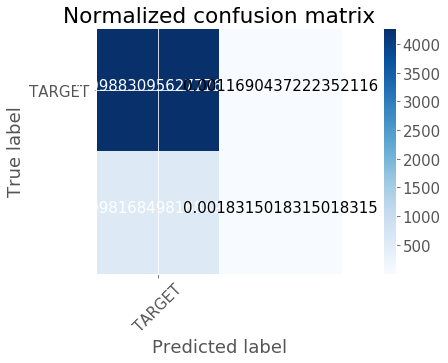

In [59]:
### И далее ;)
import itertools
from math import *
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, predict_LR)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, ['TARGET'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, ['TARGET'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


#plt.figure(figsize=(10, 8))
#plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
#                      title='Confusion matrix')
#plt.savefig("conf_matrix.png")
#plt.show()